<a href="https://colab.research.google.com/github/auviera/SKO/blob/main/SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

dmin = 0
dmax = 200
N = 200
l=np.random.randint(dmin,dmax,N)

In [ ]:
#Link Power Budget

def lpb (af,asp,ac,nsp,l,ms):
  #af = redaman fiber (dB)
  #asp = redaman splice (dB)
  #ac = redaman konektor (dB)
  #nsp = jumlah splice
  # l = jarak (km)
  # ms = margin system

  lpb_result = 2*ac + nsp*asp + l*af + ms
  return lpb_result

In [ ]:
hasil = lpb(0.4,0.5,0.5,3,13.6,6)
print (round(hasil,2),"dB")

13.94 dB


In [ ]:
hasil_grafik = lpb(0.4,0.5,0.5,3,l,6)

In [ ]:
#Daya terima

def prx(ptx,lpb_result):
  #ptx = daya pemancar
  prx_result = ptx - lpb_result
  return prx_result

def sens(l,val):
  sens_result = 0 - val *(l/l)
  return sens_result

In [ ]:
power_receiver = prx(3,hasil)
print (round(power_receiver,2),"dBm")

-10.94 dBm


In [ ]:
daya_terima = prx(3,hasil_grafik)
sensitivitas = sens(l,28)

In [ ]:
l_sort=l[np.argsort(l)]
daya_terima_sort=daya_terima[np.argsort(l)]
sensitivitas_sort=sensitivitas[np.argsort(l)]

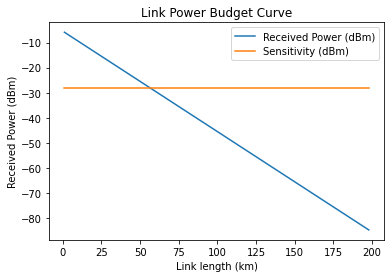

In [ ]:
plt.figure()
plt.plot(l_sort,daya_terima_sort, label="Received Power (dBm)")
plt.plot(l_sort,sensitivitas_sort, label="Sensitivity (dBm)")
plt.title('Link Power Budget Curve')
plt.xlabel('Link length (km)')
plt.ylabel('Received Power (dBm)')
plt.legend()
plt.show()

In [ ]:
#nilai NA
#n1 = indeks bias core
#n2 = indeks bias cladding

def num(n1,n2):
  na = math.sqrt((n1*n1)-(n2*n2))
  return na

In [ ]:
numerical_aparture = num(1.4562,1.4500)
n_a = round(numerical_aparture,2)
print(n_a)

0.13


In [ ]:
#nilai V
#lamb = lambda operasi (m)
#a = jari-jari (m)
#na =numerical aparture

def mode(lamb,a,na):
  lamb_m = lamb *  0.000000001
  a_m = a * 0.000001
  v_value = ((2*3.14)/lamb_m)*a_m*na
  return round(v_value,3)

In [ ]:
V = mode(1550,4.5,n_a)
print(V)

2.37


In [ ]:
#twg
#L = panjang kabel

def twg(l,n1,n2,v):
  l_m = l * 1000
  twg_value = (l/300000000)*(n1-n2)*(1-(3.14/v))
  return twg_value

In [ ]:
Twg = twg(13.6,1.4562,1.4500,2.37)
print(Twg)

-9.131701828410664e-11


In [ ]:
Twg_grafik = twg(l,1.4562,1.4500,2.37)

In [ ]:
#tmat
#dmat = dispersi material

def tmat(dmat,l,lamb):
  dmat_m = dmat * 0.000000000001
  tmat_value = dmat_m*l*lamb
  return tmat_value

In [ ]:
Tmat = tmat(4,13.6,0.1)
print(Tmat)

5.4399999999999994e-12


In [ ]:
Tmat_grafik = tmat(4,l,0.1)

In [ ]:
#tsys

def tsys(ttx,tmat,twg,trx):
  ttx_m = ttx * 0.000000000001 
  trx_m = trx * 0.000000000001 
  tsys_value = np.sqrt(((ttx_m*ttx_m)+(tmat*tmat)+(twg*twg)+(trx_m*trx_m)))
  return tsys_value

In [ ]:
Tsys = tsys(35,Tmat,Twg,15)
print(Tsys)

9.90877965659741e-11


In [ ]:
Tsys_grafik = tsys(35,Tmat_grafik,Twg_grafik,15)

In [ ]:
#bit rate system

def br(tsys):
  bitrate = (1/tsys)*0.000000001
  return bitrate

In [ ]:
bit_rate = br(Tsys)
print(round(bit_rate,1),"Gbps")

10.1 Gbps


In [ ]:
def rs(bs):
  rts = (1/bs)
  return rts

In [ ]:
#rise time system

rs_sys = rs(bit_rate)
print(round(rs_sys,3),"ns")

0.099 ns


In [ ]:
def pb(br):
  periode = 1/br
  return periode

In [ ]:
T = pb(2.5e9)
print(round((T*1000000000),3),"ns")

0.4 ns


In [ ]:
#nrz

def nrz(a):
  Nrz = (0.7*a) 
  return Nrz

#rz

def rz(b):
  Rz = (0.35*b)
  return Rz

In [ ]:
NRZ = nrz(T)
RZ = rz(T)
print(round(NRZ* 1000000000,3),"ns")
print(round(RZ* 1000000000,3),"ns")

0.28 ns
0.14 ns


In [ ]:
def g(l,val):
  gr = val * l/l
  return gr

In [ ]:
nrz_grafik = g(l,NRZ)
rz_grafik = g(l,RZ)

In [ ]:
l_sort=l[np.argsort(l)]
nrz_sort=nrz_grafik[np.argsort(l)]
rz_sort=rz_grafik[np.argsort(l)]
tsys_sort=Tsys_grafik[np.argsort(l)]

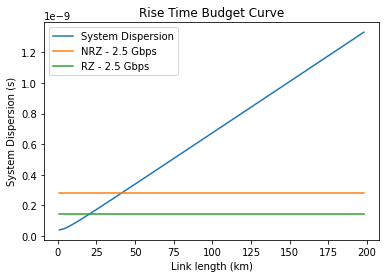

In [ ]:
plt.figure()
plt.plot(l_sort,tsys_sort, label="System Dispersion")
plt.plot(l_sort,nrz_sort, label="NRZ - 2.5 Gbps")
plt.plot(l_sort,rz_sort, label="RZ - 2.5 Gbps")
plt.title('Rise Time Budget Curve')
plt.xlabel('Link length (km)')
plt.ylabel('System Dispersion (s)')
plt.legend()
plt.show()